In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [4]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

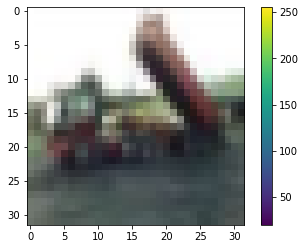

In [5]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)

plt.show()

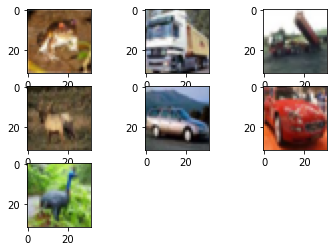

In [6]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [7]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        #tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        #tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#history = model.fit(X_train, y_train, epochs=20,batch_size = 32) #validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5476 - accuracy: 0.4348 - val_loss: 1.3257 - val_accuracy: 0.5245
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2049 - accuracy: 0.5714 - val_loss: 1.1634 - val_accuracy: 0.5894
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0635 - accuracy: 0.6240 - val_loss: 1.0505 - val_accuracy: 0.6348
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9661 - accuracy: 0.6607 - val_loss: 1.0060 - val_accuracy: 0.6498
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9001 - accuracy: 0.6824 - val_loss: 0.9327 - val_accuracy: 0.6758
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8416 - accuracy: 0.7037 - val_loss: 0.9045 - val_accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7866 - accuracy: 0.7234 - val_loss: 0.8873 -

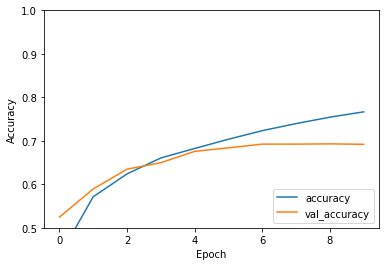

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True
            )

#augmented_images = ImageDataGenerator[datagen[0][0][0] for i in range(5)]
#plotImages(augmented_images)

In [13]:
datagen.fit(X_train)

In [14]:

history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4835 - accuracy: 0.4739 - val_loss: 1.1018 - val_accuracy: 0.6173
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4044 - accuracy: 0.4993 - val_loss: 1.0158 - val_accuracy: 0.6492
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3721 - accuracy: 0.5102 - val_loss: 1.1336 - val_accuracy: 0.5971
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3322 - accuracy: 0.5243 - val_loss: 1.0037 - val_accuracy: 0.6472
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2979 - accuracy: 0.5399 - val_loss: 1.0580 - val_accuracy: 0.6283
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2915 - accuracy: 0.5406 - val_loss: 1.0345 - val_accuracy: 0.6380
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2737 - accuracy: 0.5478 - val_loss: 1.0128 -

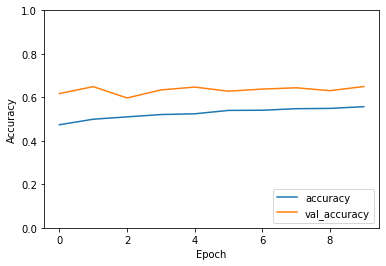

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')